In [8]:
pip install pyforest


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as px
import numpy as np


In [3]:
df=pd.read_csv("C:\\Users\\ANSHIKA TANDON\\Downloads\\Copy of Sample_DATA.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [5]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
642    False
643    False
644    False
645    False
646    False
Length: 647, dtype: bool

In [8]:
df.duplicated().sum()


0

In [9]:
df.drop_duplicates()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,T00026082,24/07/23,3:12:04 AM,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,34.163.43.64,Pending,iOS,4,Travel bookings,In-store,14.00,25,28.27,0
643,T00017272,05/07/23,6:21:18 AM,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,129.125.172.104,Pending,Windows,10,More Services,Mobile,-33.38,28,26.26,0
644,T00048923,16/04/23,8:32:41 AM,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,27.48.57.181,Failed,Android,1,More Services,Online,-44.37,19,6.02,0
645,T00022497,28/10/23,9:33:42 AM,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,206.122.250.79,Failed,Windows,2,Investment,In-store,-57.29,12,17.12,0


In [10]:
df.isnull()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [12]:
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [14]:
df.shape

(647, 20)

In [15]:
df.drop(['Transaction_ID','Merchant_ID', 'Customer_ID','Device_ID','IP_Address'],axis=1,inplace=True)

In [16]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


DATA cleaning 

In [18]:
df.Date


0      20/04/23
1      08/08/23
2      25/06/23
3      28/01/24
4      21/06/23
         ...   
642    24/07/23
643    05/07/23
644    16/04/23
645    28/10/23
646    11/04/24
Name: Date, Length: 647, dtype: object

In [19]:
df[['Date','amount']]

,Date,amount
0,20/04/23,396.62
1,08/08/23,121.94
2,25/06/23,106.69
3,28/01/24,3611.11
4,21/06/23,374.89
...,...,...
642,24/07/23,28.27
643,05/07/23,26.26
644,16/04/23,6.02
645,28/10/23,17.12


In [21]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

<IPython.core.display.Javascript object>

Extract year from date module

In [22]:
df['year']=df['Date'].dt.year

In [23]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023


In [24]:
df['month']=df['Date'].dt.month

In [25]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [28]:
df['month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
months = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}


In [31]:
df['month']=df['month'].map(months)

In [34]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [35]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'year', 'month'],
      dtype='object')

In [38]:
df['fraud'].value_counts(normalize=True)*100

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

In [40]:

sns.set(style="white")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='fraud', ylabel='count'>

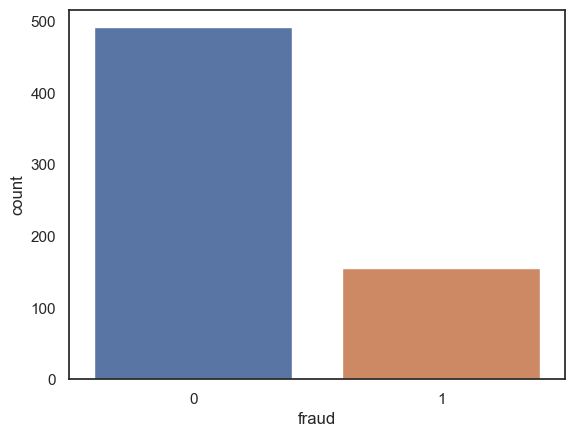

In [41]:
sns.countplot(data=df,x='fraud')